In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , precision_score , recall_score , roc_curve , auc

In [3]:
df = pd.read_csv("diabetes.csv") 
print(df.head()) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.shape)

(768, 9)


In [5]:
print(df.describe()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
print(df.isnull().sum()) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print((df.isnull().sum() / len(df)) * 100)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


WHAT IS THE MOST IMPACT FEATURE ON DIABETES 

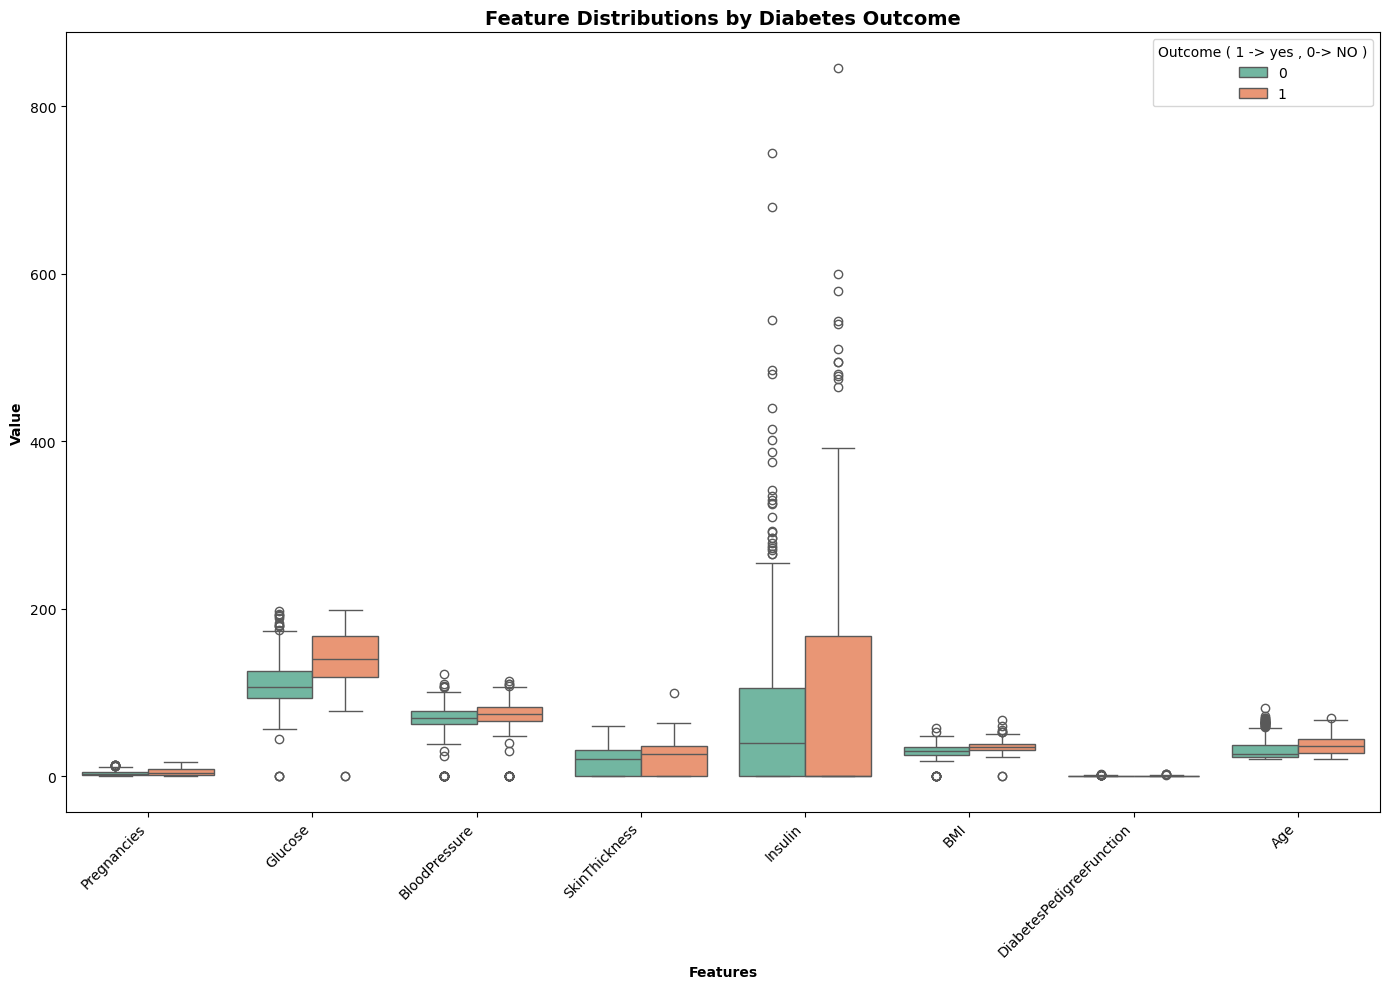

In [10]:
plt.figure(figsize=(14,10)) 

df_melted = df.melt(id_vars = 'Outcome' , var_name = 'Features' , value_name = 'value' ) 

sns.boxplot( x = 'Features' , y= 'value' , hue = 'Outcome' , data = df_melted , palette='Set2')  
plt.title("Feature Distributions by Diabetes Outcome", fontweight='bold', fontsize=14) 
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Features", fontweight='bold')
plt.ylabel("Value", fontweight='bold') 
plt.legend(title ='Outcome ( 1 -> yes , 0-> NO )') 
plt.tight_layout()
plt.show() 

From the visualization, we can clearly observe that Glucose has the most significant impact on diabetes outcome — there is a strong difference in its distribution between diabetic and non-diabetic individuals.
Insulin also shows a noticeable difference, although with high variability and many outliers, suggesting that while it is an important feature, it might require normalization or outlier treatment.
Age, BloodPressure, and other features (such as BMI and SkinThickness) show only mild differences between the two groups, indicating that they may have secondary or supporting effects rather than being primary predictors.

In [11]:
df[['Glucose', 'Insulin']].describe()


,Glucose,Insulin
count,768.000000,768.000000
mean,120.894531,79.799479
std,31.972618,115.244002
min,0.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,30.500000
75%,140.250000,127.250000
max,199.000000,846.000000


There are insulin values ​​= 0 in a quarter of the entire sample (25%)! ← This is not a “true zero”, it is a missing value (missing data) that was written as zero.  
It has a glucose value of 0, which is medically impossible. 
The statistical test compares two sets full of "false" zeros → it finds them to be completely similar to each other 

In [12]:
from scipy.stats import ttest_ind 

group0 = df[df['Outcome'] == 0 ]  
group1 = df[df['Outcome'] == 0 ] 

for features in ['Glucose' , 'Insulin'] : 
    state , p = ttest_ind(group0[features] , group1[features] ,  nan_policy='omit') 
    print(f"{features} --> p_value {p:.5f}") 

Glucose --> p_value 1.00000
Insulin --> p_value 1.00000


so we will handle it first and repeat the test again  
Fill the zeros valus with nan value and after that we will replace it 

In [13]:
cols_with_invalid_zero = ['Glucose', 'Insulin'] 
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace( 0 , np.nan) 

print(df.isna().sum()) 

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [15]:
df.groupby('Outcome')[['Glucose','Insulin']].mean()

,Glucose,Insulin
Outcome,,
0,110.682000,127.792000
1,142.130597,164.701493


Repeat The Test Again 

In [16]:
from scipy.stats import ttest_ind

group0 = df[df['Outcome'] == 0]
group1 = df[df['Outcome'] == 1]

for feature in ['Glucose', 'Insulin']:
    stat, p = ttest_ind(group0[feature], group1[feature], nan_policy='omit', equal_var=False)
    print(f"{feature} --> t-stat = {stat:.4f}, p-value = {p:.5f}")

Glucose --> t-stat = -14.8527, p-value = 0.00000
Insulin --> t-stat = -5.2676, p-value = 0.00000


As observed earlier, glucose is the most influential feature in distinguishing between diabetic and non-diabetic individuals.
If we compare two patients, the difference in glucose levels will generally be the most significant indicator of diabetic status.
In contrast, insulin levels are influenced by the stage of the disease — they tend to rise in the early stages and may decline as the condition progresses.
Therefore, insulin acts as an explanatory variable that provides additional context but is not the primary determinant of the diabetes outcome.

Check On The power of bonding 

In [17]:
df[['Glucose' , 'Insulin' , 'Outcome']].corr() 

,Glucose,Insulin,Outcome
Glucose,1.000000,0.419451,0.492782
Insulin,0.419451,1.000000,0.203790
Outcome,0.492782,0.203790,1.000000


There is a moderate to strong positive relationship between blood glucose levels and diabetes status.
The higher the blood glucose level, the greater the likelihood of being diabetic.
This relationship is highly logical, as it directly reflects the physiological basis of diabetes — elevated blood glucose is the primary symptom and diagnostic indicator of the disease.
Insulin, on the other hand, shows a weaker but still meaningful correlation.
It helps to explain the behavior of glucose levels, since insulin typically increases in response to higher glucose levels.
However, its relationship is less consistent because insulin levels vary depending on the stage and progression of the disease.

Doing a Heatmap for correlation  

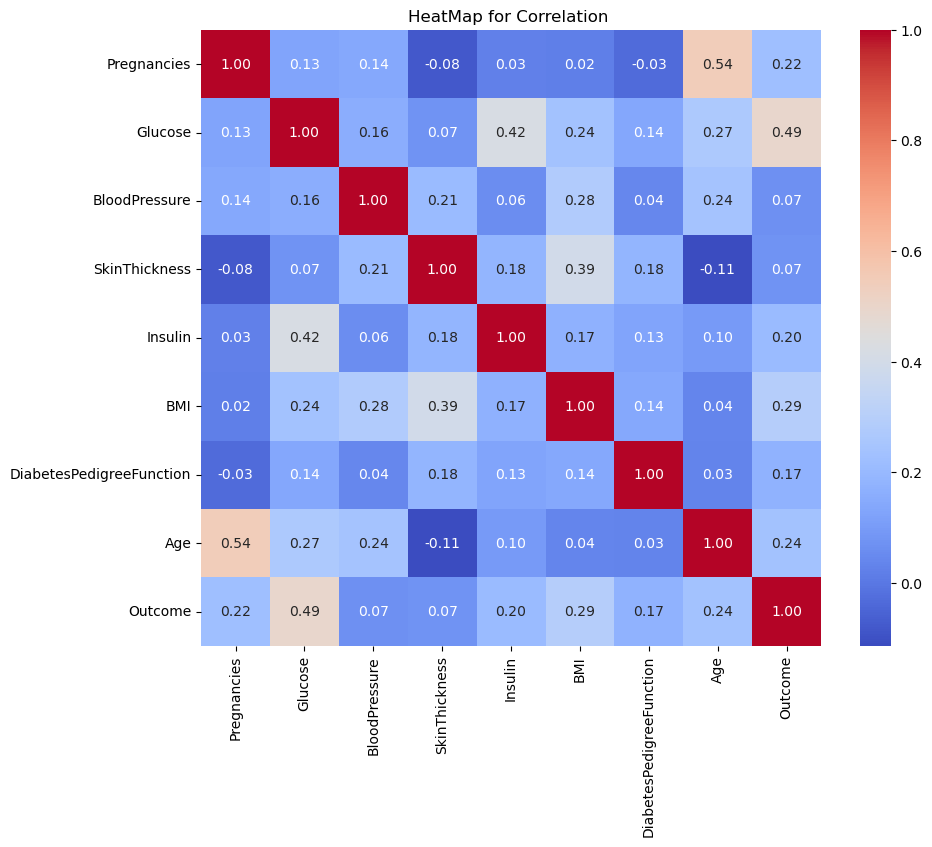

In [18]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm', fmt=".2f" ) 
plt.title("HeatMap for Correlation ") 
plt.show() 

Looking at the effeact Glucose do on the outcome 

C:\Users\DELL\AppData\Local\Temp\ipykernel_656\841920333.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Outcome(1 is diabetes , 0 is not diabetes)')


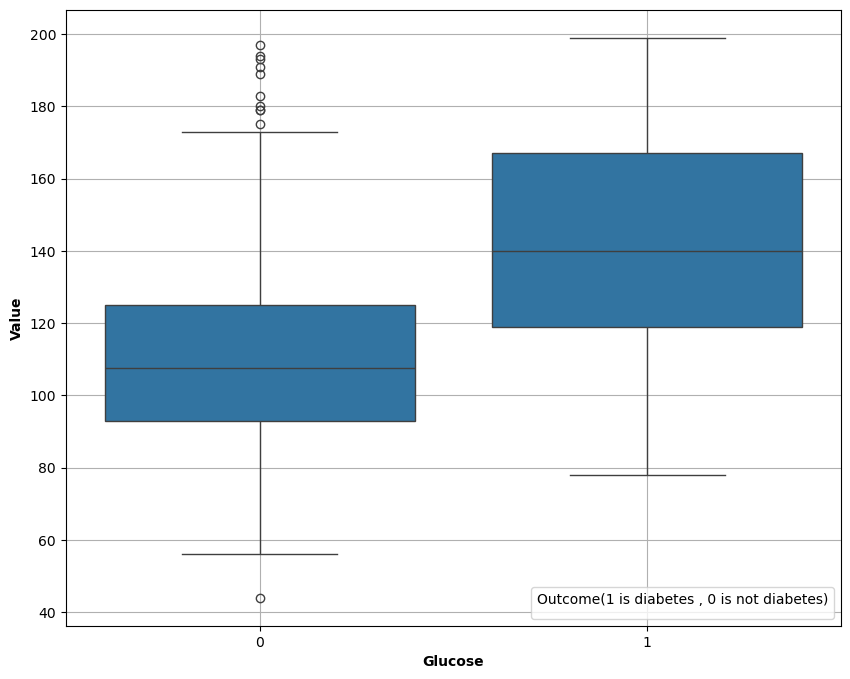

In [19]:
plt.figure(figsize = (10,8)) 
sns.boxplot( x= "Outcome" , y= 'Glucose' , data = df ) 
plt.xlabel('Glucose' , fontweight = 'bold') 
plt.ylabel('Value' , fontweight = 'bold') 
plt.legend(title = 'Outcome(1 is diabetes , 0 is not diabetes)') 
plt.grid(True) 
plt.show() 

Looking at the effeact Insulin do on the outcome 

C:\Users\DELL\AppData\Local\Temp\ipykernel_656\307447243.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Outcome(1 is diabetes , 0 is not diabetes)')


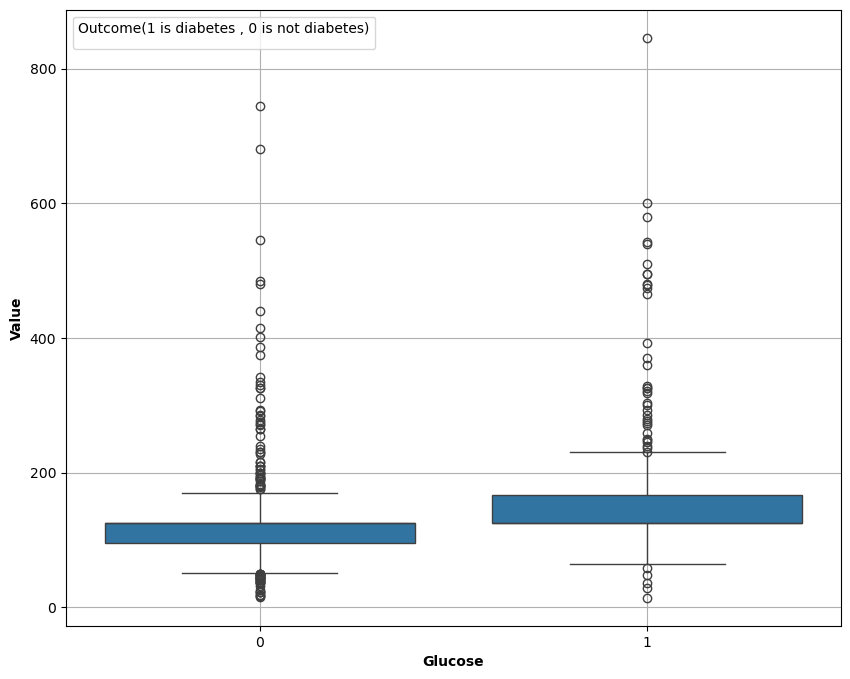

In [20]:
plt.figure(figsize = (10,8)) 
sns.boxplot( x= "Outcome" , y= 'Insulin' , data = df ) 
plt.xlabel('Glucose' , fontweight = 'bold') 
plt.ylabel('Value' , fontweight = 'bold') 
plt.legend(title = 'Outcome(1 is diabetes , 0 is not diabetes)') 
plt.grid(True) 
plt.show() 

looking for the scatter between Insulin And Glucose And Insulin , Outcome 

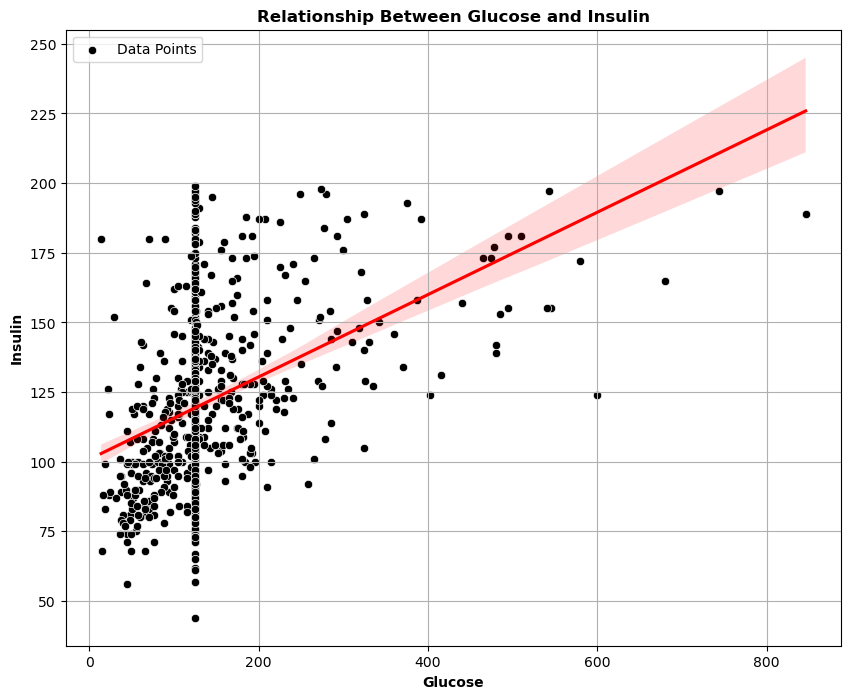

In [21]:
plt.figure(figsize = (10 , 8)) 
sns.scatterplot(data = df , x = 'Insulin' , y = 'Glucose' , color = 'black' , label = 'Data Points') 
sns.regplot( x = 'Insulin' , y = 'Glucose' , color = 'red' , data =df , scatter = False ) 
plt.xlabel('Glucose', fontweight='bold')
plt.ylabel('Insulin', fontweight='bold') 
plt.title('Relationship Between Glucose and Insulin', fontweight='bold')
plt.grid(True)
plt.show() 

In [22]:
from scipy.stats import linregress

slope,intercept , r , p , std_err = linregress(df['Glucose'] , df['Insulin']) 
print(f"Equation: Insulin = {intercept:.2f} + {slope:.2f} * Glucose") 
print(f"Correlcation(r) :{r:.2f}") 
print(f"p-value:{p:.5f}") 

Equation: Insulin = -4.15 + 1.19 * Glucose
Correlcation(r) :0.42
p-value:0.00000


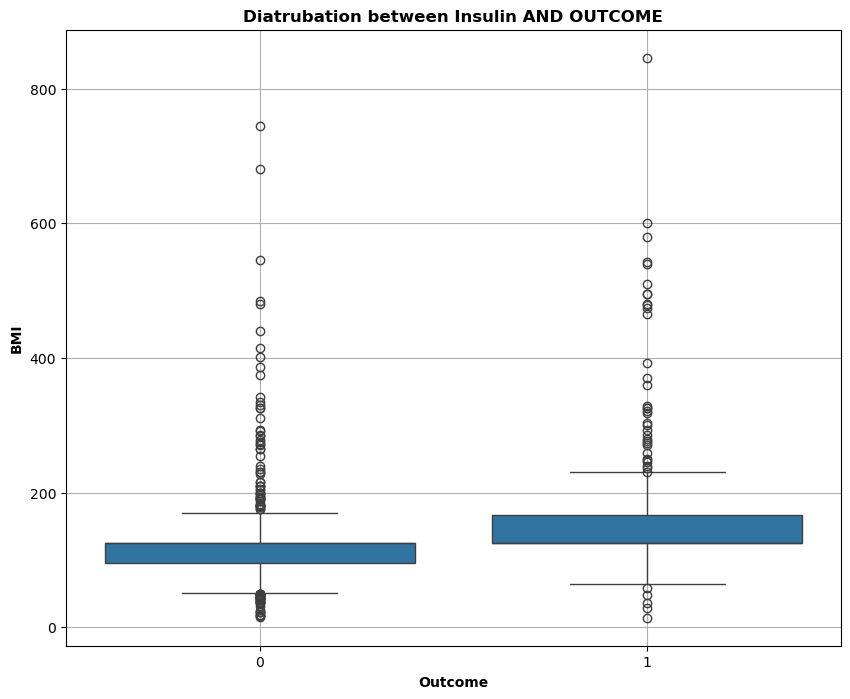

In [23]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x='Outcome' , y ='Insulin' , data = df) 
plt.title("Diatrubation between Insulin AND OUTCOME" , fontweight = 'bold') 
plt.xlabel("Outcome" , fontweight ='bold') 
plt.ylabel("BMI" , fontweight = 'bold') 
plt.grid(True) 
plt.show() 

The scatter plot shows a moderate positive relationship between glucose and insulin levels.
As glucose levels increase, insulin levels tend to rise as well, which reflects the physiological response of the body to regulate blood sugar.
However, the spread of points indicates variability — some individuals with high glucose have relatively low insulin, which may represent insulin resistance or pancreatic dysfunction in later disease stages.
This supports the previous correlation analysis, confirming that glucose has the strongest link to diabetes outcome, while insulin provides supporting explanatory insight.  

The liner equation we use appear that there is a strong relation between glucos and insulian when the glacus became high the insulain become high too but there is another features impact on 

Age and Its Relationship with Glucose Levels AND OUTCOME

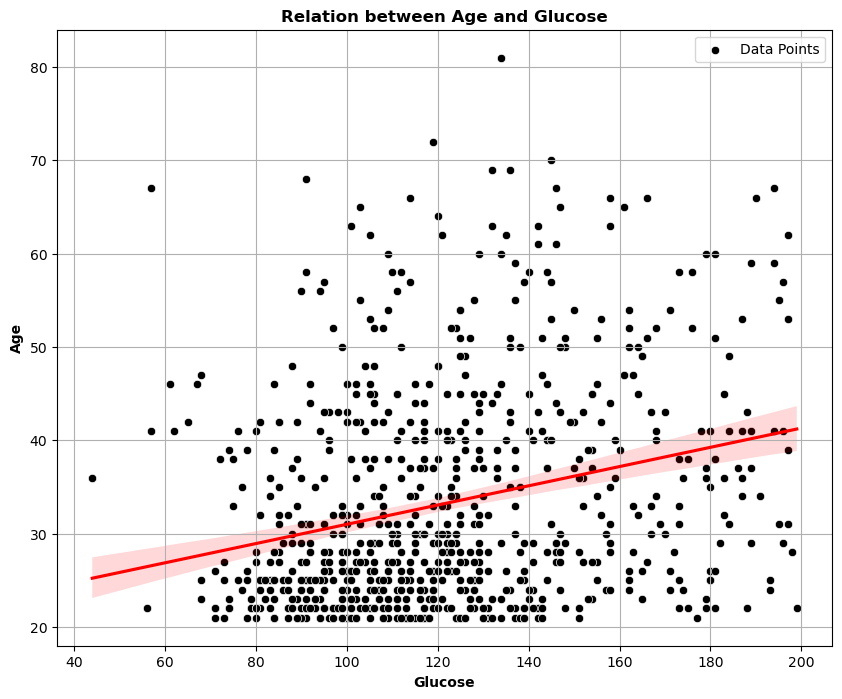

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df , x = 'Glucose' , y = 'Age' , color = 'black' , label = 'Data Points') 
sns.regplot(data = df , x = 'Glucose' , y = 'Age' , color= 'red', scatter = False , label = 'LinearRegression') 
plt.title("Relation between Age and Glucose", fontweight = 'bold') 
plt.xlabel("Glucose" , fontweight='bold') 
plt.ylabel("Age" , fontweight = 'bold') 
plt.grid(True)
plt.show() 

In [25]:
from scipy.stats import linregress 
slope , intercept , r , p , std_err = linregress(df['Glucose'] , df['Age']) 
print(f"Equation : Age = {intercept:.2f} + {slope:.2f} * Glucose") 
print(f"Correlcation(r) :{r:.2f}")
print(f"P-value: {p:.5f}")

Equation : Age = 20.70 + 0.10 * Glucose
Correlcation(r) :0.27
P-value: 0.00000


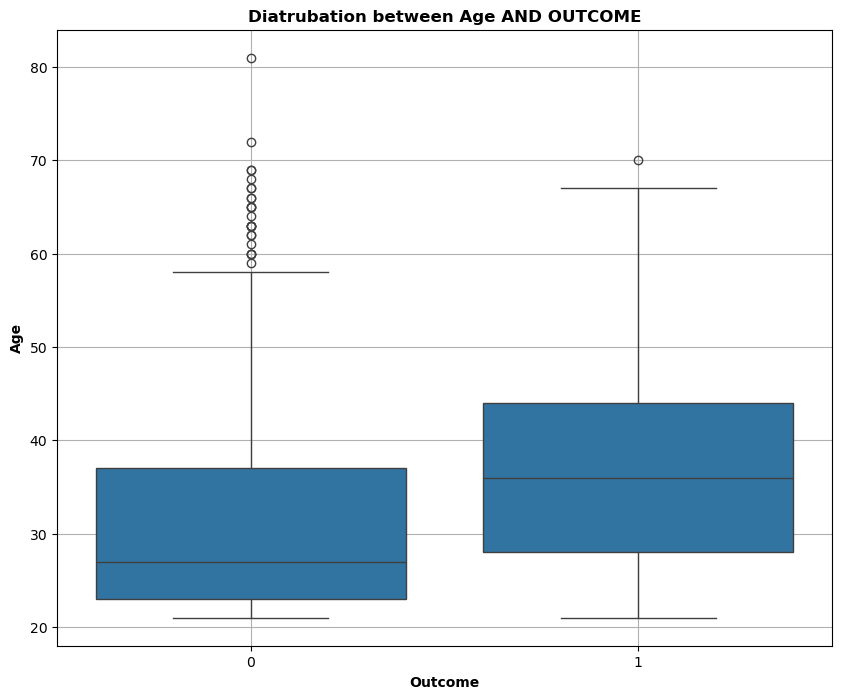

In [26]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x='Outcome' , y ='Age' , data = df) 
plt.title("Diatrubation between Age AND OUTCOME" , fontweight = 'bold') 
plt.xlabel("Outcome" , fontweight ='bold') 
plt.ylabel("Age" , fontweight = 'bold') 
plt.grid(True) 
plt.show() 

we can see from the visualization and analysis, the correlation between Age and Glucose is weak (
r=0.27), indicating that Age has little direct impact on Glucose levels. However, by examining the scatter plot, regplot, and the calculated linear regression equation:
Glucose=20.70+0.10⋅Age
We observe a slight positive trend, meaning that Glucose tends to increase very gradually with Age.
The slope is small (0.10), reinforcing that Age alone cannot explain much of the variation in Glucose.
Most of the variation in Glucose is explained by other factors such as BMI, lifestyle, and genetics rather than Age.
Conclusion: Age is a supporting variable but not a major predictor of Glucose levels.

See BMI impact on galcus and outcome  

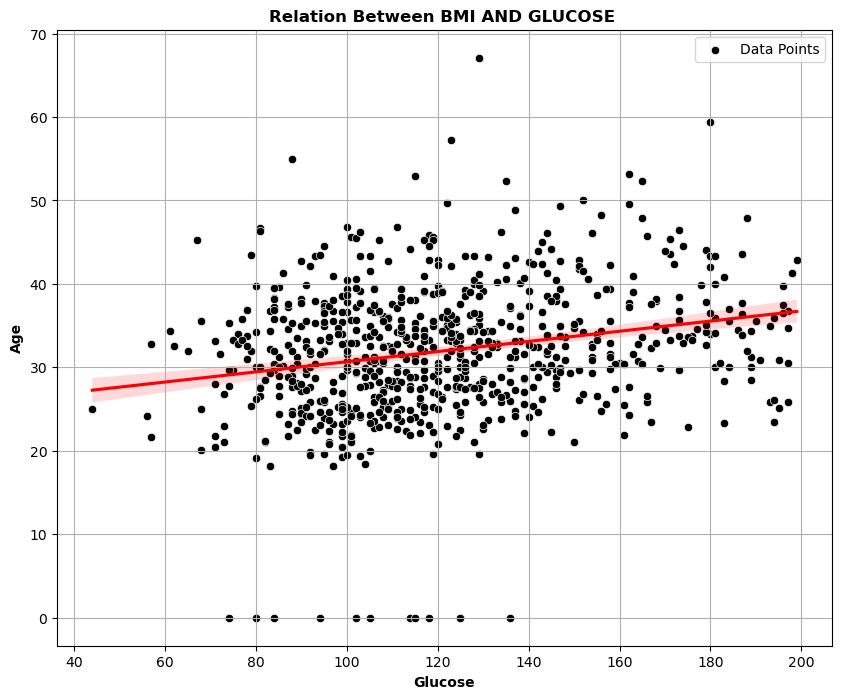

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df ,x = 'Glucose'  , y = 'BMI' , color = 'black' , label = "Data Points")
sns.regplot( data= df ,  x=  'Glucose' , y = 'BMI', color  = 'red' , scatter = False , label = "LinearRegression" ) 
plt.title("Relation Between BMI AND GLUCOSE " , fontweight = 'bold') 
plt.xlabel("Glucose" , fontweight='bold') 
plt.ylabel("Age" , fontweight = 'bold') 
plt.grid(True)
plt.show()  

In [28]:
slope , intercept , r , p , str_err = linregress(df['Glucose'] , df['BMI']) 
print(f"Equation :  BMI = {intercept:.2f} + {slope:.2f} *Glucose") 
print(f"Correclatio(r) : {r:.2f}") 
print(f"p-value :{p:.5f}") 

Equation :  BMI = 24.59 + 0.06 *Glucose
Correclatio(r) : 0.24
p-value :0.00000


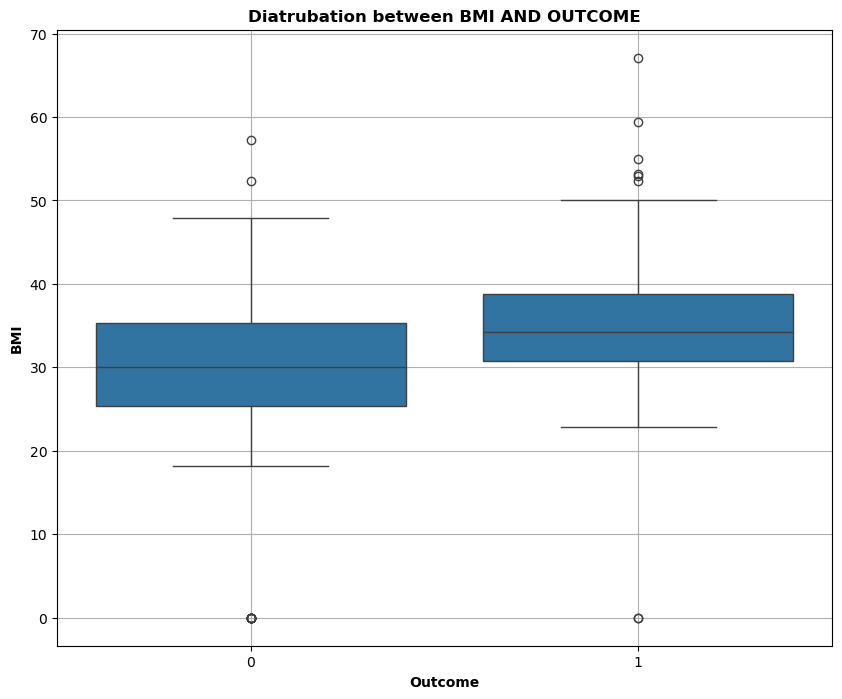

In [29]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x='Outcome' , y ='BMI' , data = df) 
plt.title("Diatrubation between BMI AND OUTCOME" , fontweight = 'bold') 
plt.xlabel("Outcome" , fontweight ='bold') 
plt.ylabel("BMI" , fontweight = 'bold') 
plt.grid(True) 
plt.show() 

From the visualization of Outcome vs Glucose, we can observe a weak relationship between Glucose levels and the diabetes outcome.
Although Glucose is the primary diagnostic factor for diabetes, in this dataset the scatter and distribution show that its direct correlation with Outcome is not very strong.
This suggests that while high Glucose is necessary for diagnosis, other factors such as BMI, Insulin, Age, and genetic predisposition also contribute significantly to whether an individual develops diabetes.
Therefore, relying on Glucose alone does not fully explain the variation in Outcome; A multivariate approach would provide better predictive insight.

USING FEATURE IMPORTANCES TO KNOW WHAT IS THE IMPORTANT FEATURES 

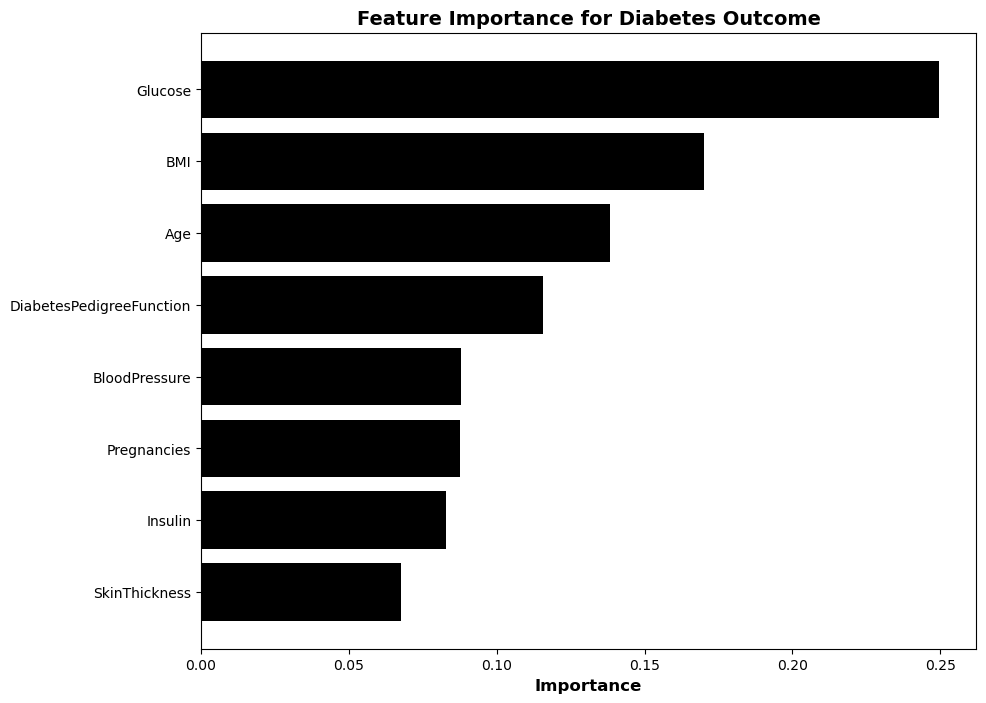

In [30]:
from sklearn.ensemble import RandomForestClassifier

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', ]] 
y = df['Outcome'] 

x_train , x_test , y_train , y_test = train_test_split( x , y, test_size = 0.2 , random_state = 47)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train , y_train) 

importance = model.feature_importances_ 
features_name = x.columns 

sorted_importance = importance.argsort()[::-1] 

plt.figure(figsize = (10,8)) 
plt.barh(range(len(sorted_importance)) , importance[sorted_importance] , align = 'center' , color = 'black') 
plt.yticks(range(len(sorted_importance)) , features_name[sorted_importance]) 
plt.gca().invert_yaxis() 

plt.title('Feature Importance for Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12 , fontweight = 'bold')
plt.show() 

In [31]:
print(df.columns) 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [32]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age'] 
target = 'Outcome'

x = df[features]  
y = df[target]    

print(x.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [33]:
x.fillna(x.median())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,125.0,33.6,0.627,50
1,1,85.0,66,29,125.0,26.6,0.351,31
2,8,183.0,64,0,125.0,23.3,0.672,32
3,1,89.0,66,23,94.0,28.1,0.167,21
4,0,137.0,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63
764,2,122.0,70,27,125.0,36.8,0.340,27
765,5,121.0,72,23,112.0,26.2,0.245,30
766,1,126.0,60,0,125.0,30.1,0.349,47


In [34]:
#Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns) 

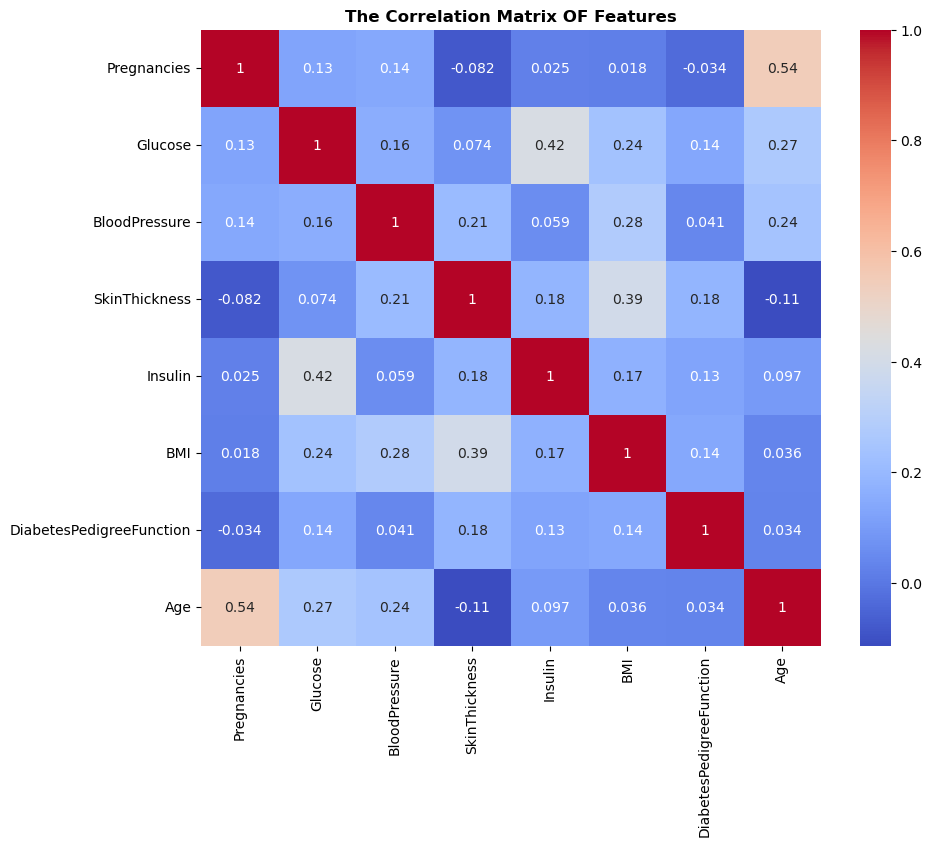

In [35]:
#SEE THE correlation 
plt.figure(figsize = (10,8))
sns.heatmap(x_scaled.corr() , annot = True , cmap = 'coolwarm')
plt.title("The Correlation Matrix OF Features" , fontweight = 'bold') 
plt.show()

BoxPlots for Outliers 

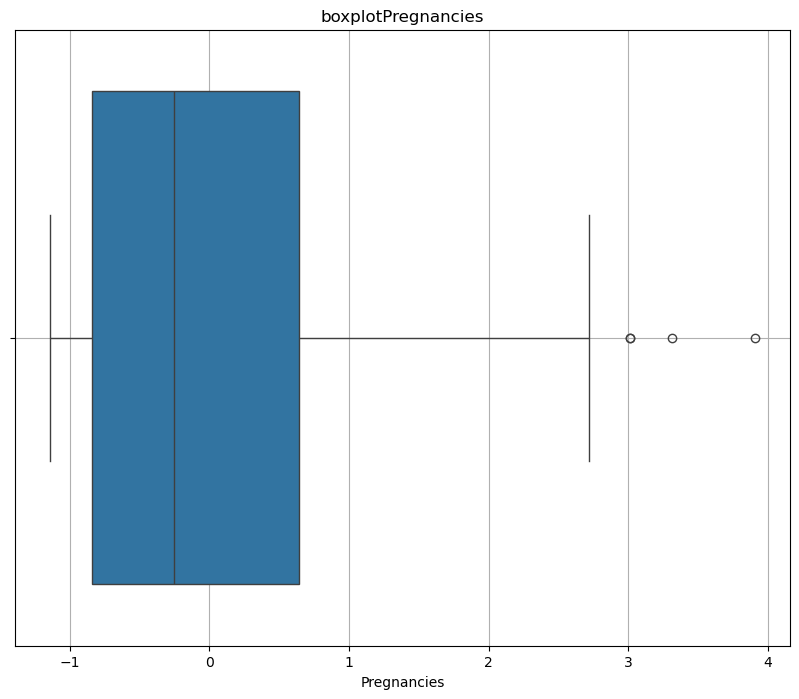

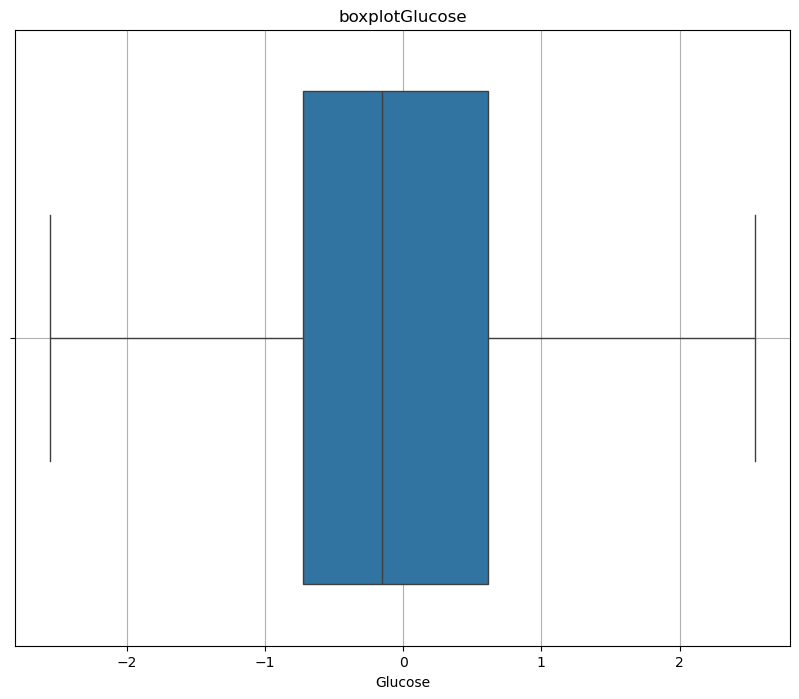

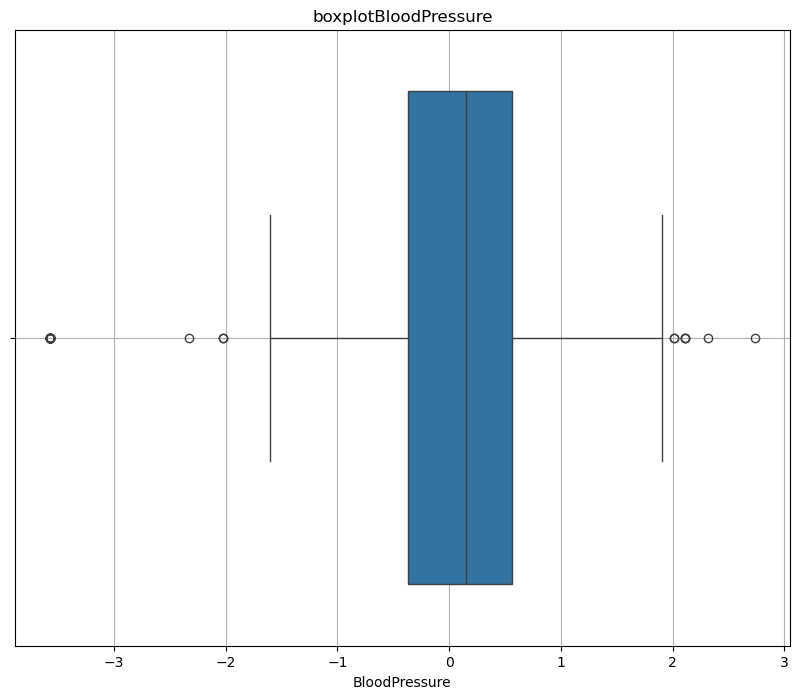

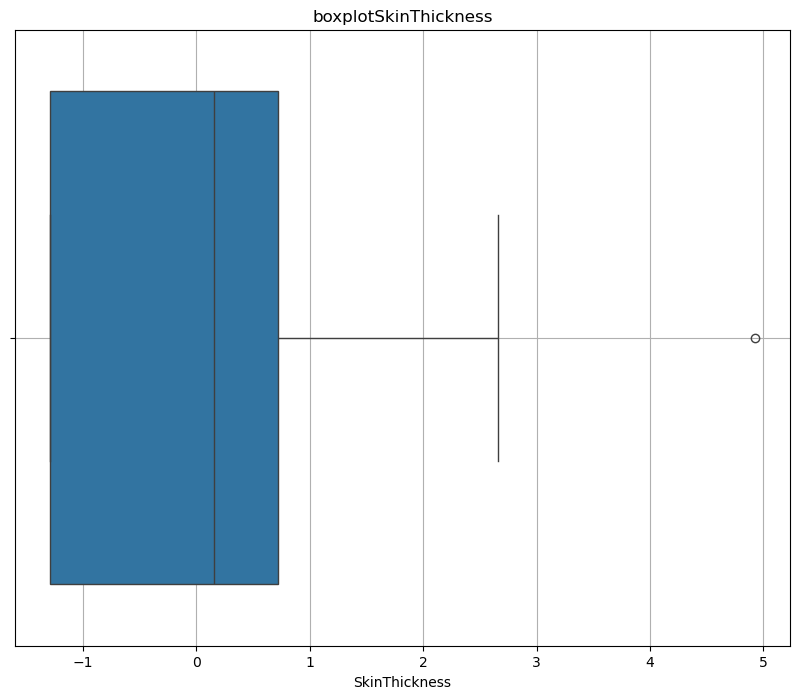

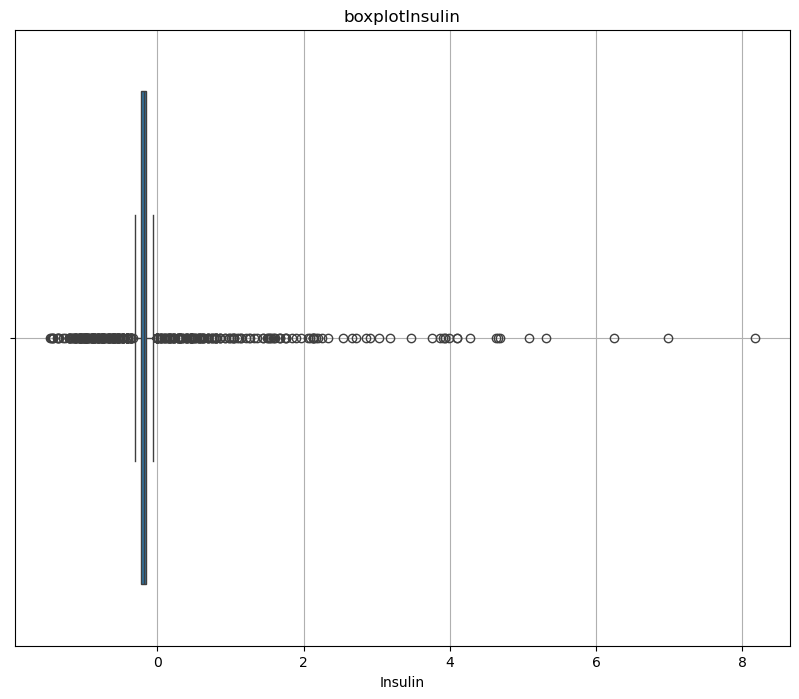

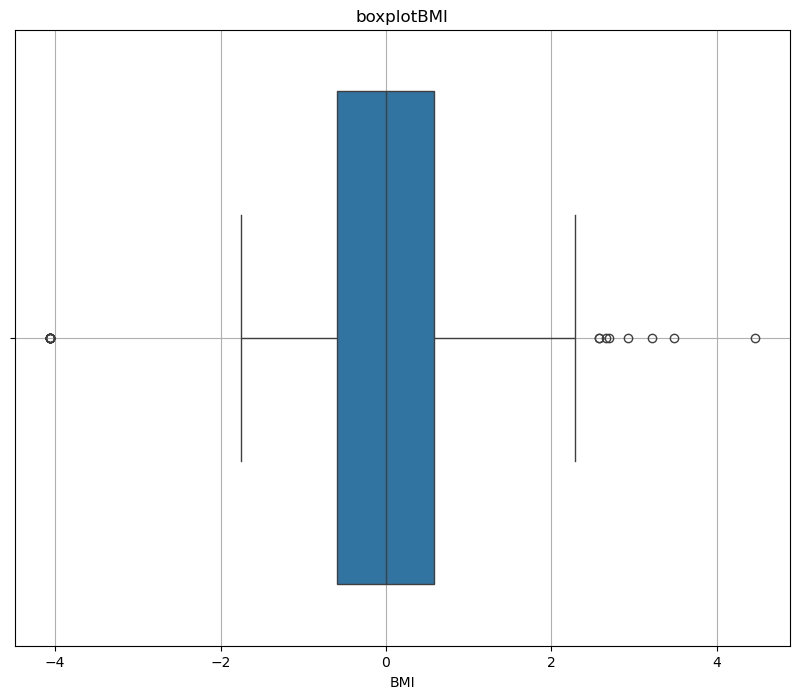

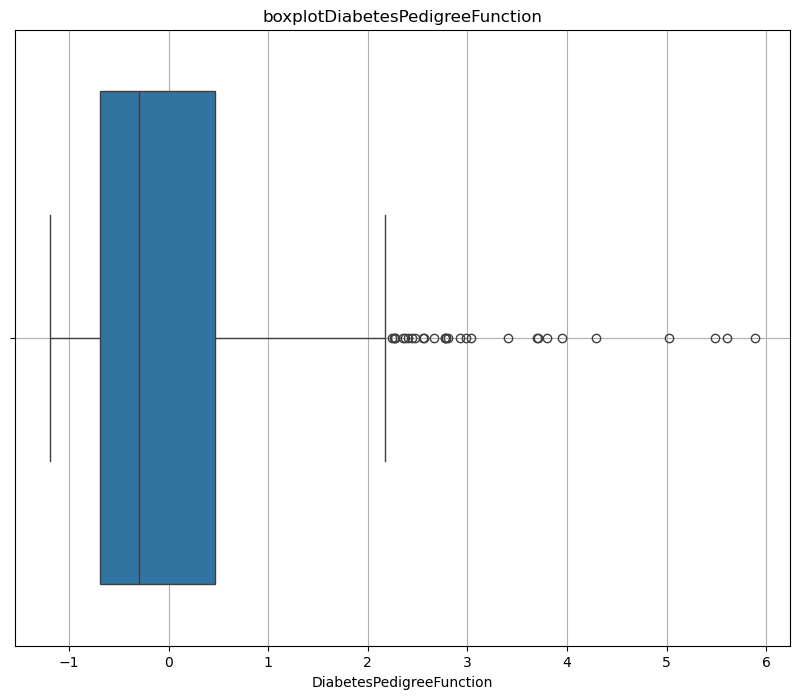

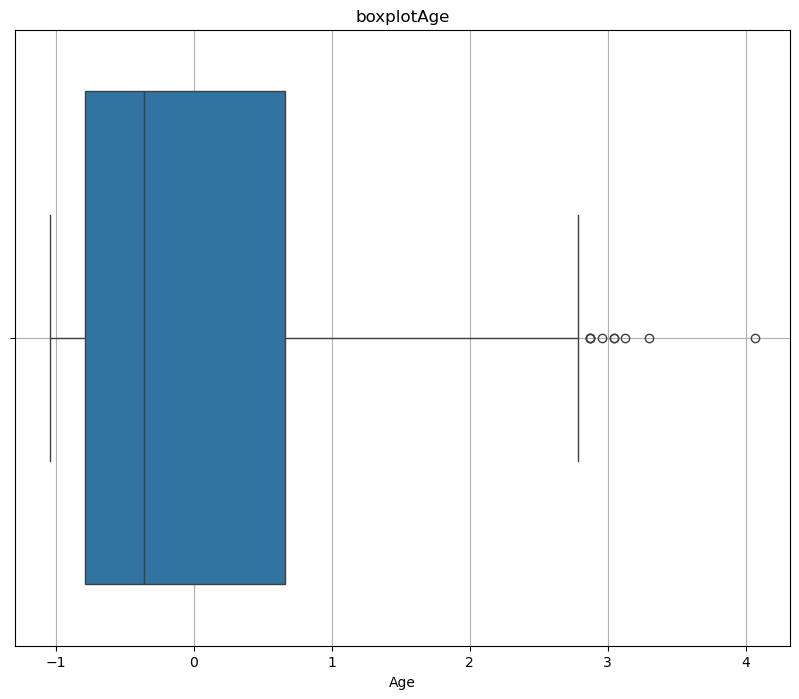

In [36]:
for col in features : 
    plt.figure(figsize = (10,8)) 
    sns.boxplot(x=x_scaled[col])
    plt.title(f"boxplot{col}")
    plt.grid(True) 
    plt.show() 


Preapre Data to ML Models 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data ready for Regression or Classification models.")

Data ready for Regression or Classification models.


Trying diff models and compare between them nd see how we can choose model and use it for final model we will improve it accurcy , doing anlysis and predictaion on it 

Train Logistic Regression.

Show metrics: Accuracy, F1, Precision, Recall.

Plot confusion matrix and ROC curve.

   Accuracy  F1 Score  Precision    Recall
0  0.720779  0.565657   0.622222  0.518519


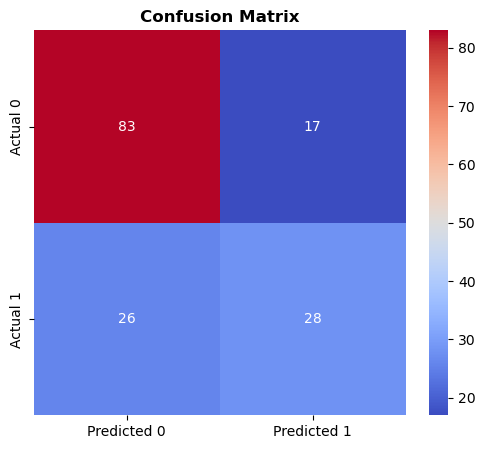

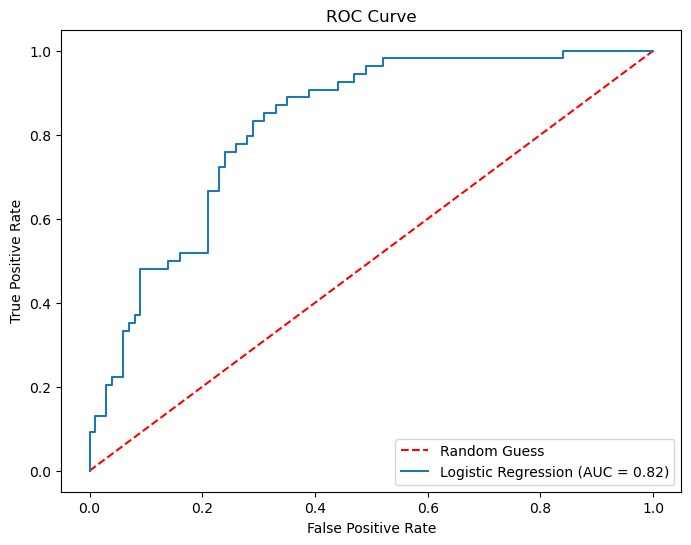

In [38]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1] 

summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
summary_df = pd.DataFrame([summary])
print(summary_df)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest.
Show metrics: Accuracy, F1, Precision, Recall.
Plot confusion matrix and ROC curve. 

   Accuracy  F1 Score  Precision    Recall
0   0.62987  0.149254   0.384615  0.092593

=== Confusion Matrix ====
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       100
           1       0.38      0.09      0.15        54

    accuracy                           0.63       154
   macro avg       0.52      0.51      0.46       154
weighted avg       0.56      0.63      0.55       154



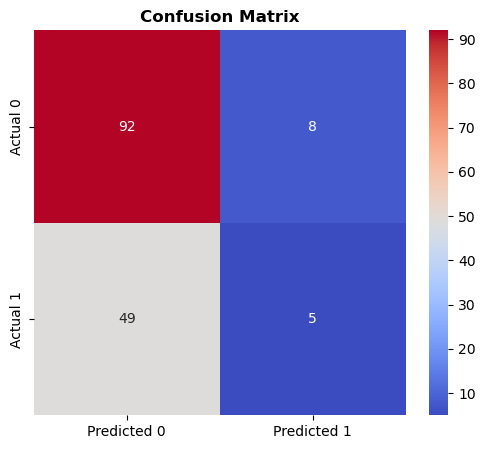

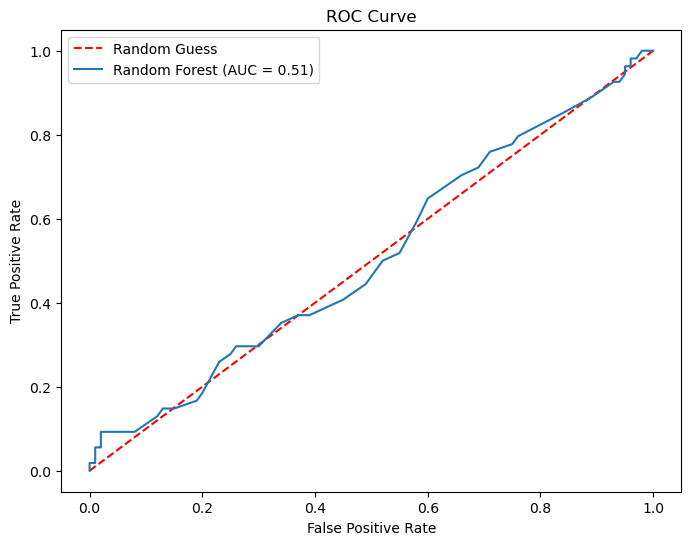

In [39]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc , classification_report


# Train Model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

# Metrics
summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
summary_df = pd.DataFrame([summary])
print(summary_df)

print("\n=== Confusion Matrix ====") 
print(classification_report(y_test , y_pred)) 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Try to improve random with smote 

Before: {0: 400, 1: 214}
After: {0: 400, 1: 400}

=== Model Performance Summary ===
   Accuracy  F1 Score  Precision    Recall
0  0.733766  0.677165   0.589041  0.796296

=== Detailed Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       100
           1       0.59      0.80      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



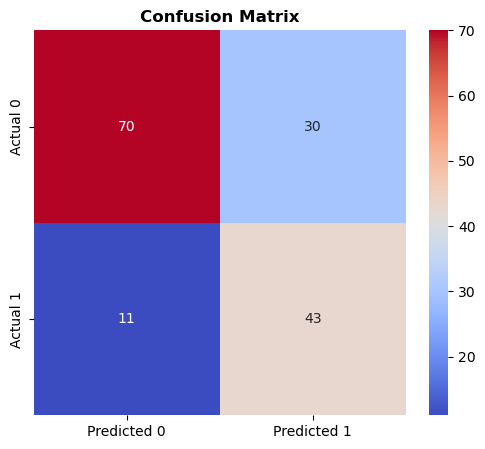

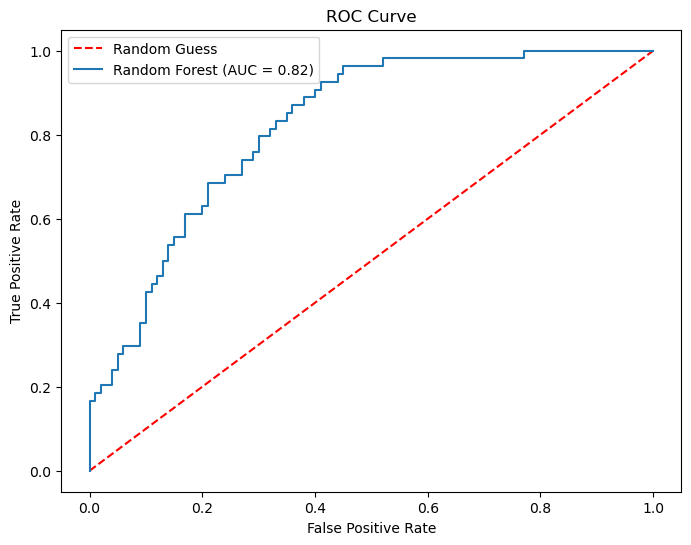

In [40]:
# =========================
# 🔹 STEP 1 — Import Libraries
# =========================
from imblearn.over_sampling import SMOTE
# =========================
# 🔹 STEP 2 — Split Data 
# =========================
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# 🔹 STEP 3 — Apply SMOTE
# =========================
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts().to_dict())
print("After:", y_resampled.value_counts().to_dict())

# =========================
# 🔹 STEP 4 — Train Random Forest
# =========================
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# =========================
# 🔹 STEP 5 — Evaluation Metrics
# =========================
summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
summary_df = pd.DataFrame([summary])
print("\n=== Model Performance Summary ===")
print(summary_df)

print("\n=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred))

# =========================
# 🔹 STEP 6 — Confusion Matrix Visualization
# =========================
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# =========================
# 🔹 STEP 7 — ROC Curve
# =========================
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Using xgboost .  Show metrics: Accuracy, F1, Precision, Recall. Plot confusion matrix and ROC curve.


In [41]:
import xgboost as xgb 
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

model = xgb.XGBClassifier(
    tree_method='hist',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=ratio  
)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)

y_proba = model.predict_proba(x_test)[:, 1]

threshold = 0.4  
y_pred = (y_proba > threshold).astype(int)

summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
print(pd.DataFrame([summary]))
print("\n", classification_report(y_test, y_pred, zero_division=0))


   Accuracy  F1 Score  Precision    Recall
0  0.733766  0.661157   0.597015  0.740741

               precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.60      0.74      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154




=== Model Performance Summary ===
   Accuracy  F1 Score  Precision    Recall
0  0.741042   0.63109   0.626728  0.635514

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       400
           1       0.63      0.64      0.63       214

    accuracy                           0.74       614
   macro avg       0.72      0.72      0.72       614
weighted avg       0.74      0.74      0.74       614



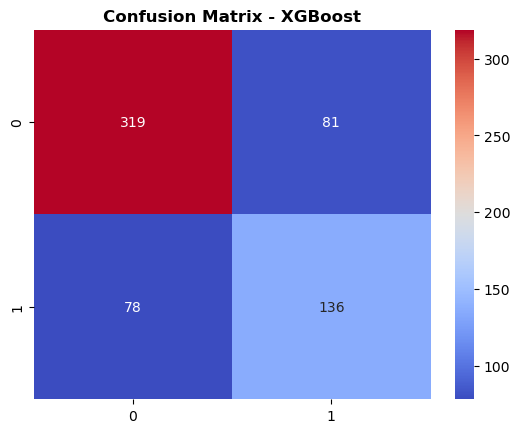

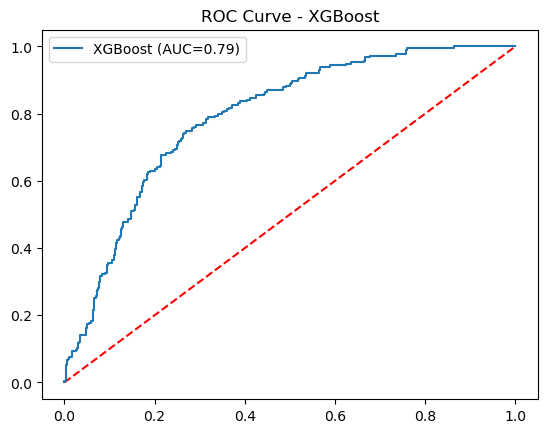

In [54]:
ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])

model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,  
    random_state=42,
    eval_metric='logloss'
)

model.fit(x_train, y_train) 

#PREDICATION
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

#ACCUARCY 
summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
summary_df = pd.DataFrame([summary])
print("\n=== Model Performance Summary ===")
print(summary_df)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix - XGBoost", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, label=f'XGBoost (AUC={roc_auc:.2f})')
plt.legend()
plt.title("ROC Curve - XGBoost")
plt.show()

Using LightGBM. 

[LightGBM] [Info] Number of positive: 54, number of negative: 100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

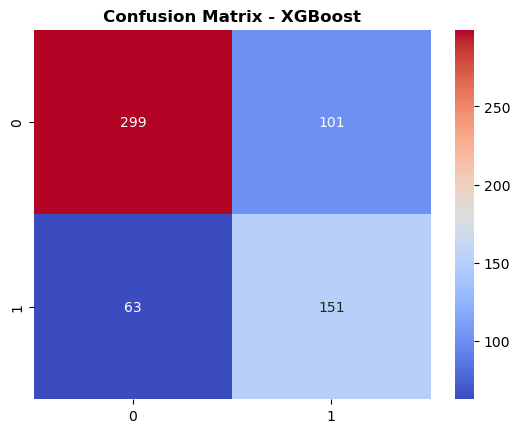

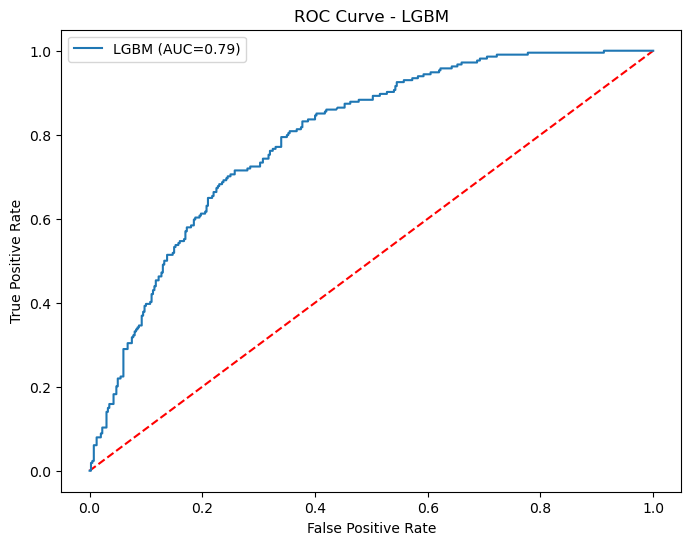

In [56]:
import lightgbm as lgb  

ratio = len(y_train[y_train==0]) / len(y_train[y_train ==1]) 

#Model 
model = lgb.LGBMClassifier(
    n_estimators = 100 , 
    learning_rate = 0.1 , 
    max_depth = 5  , 
    subsample_for_bin = 20000 , 
    class_weight = 'balanced' , 
    min_split_gain = 0.1 , 
    subsample = 1.0 , 
    n_jobs  = -1 ,
    scale_pos_weight = ratio 
) 

#==================Predictions ===================
model.fit(x_train , y_train) 
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:,1] 

#===================Summary Predication Accuarcy========== 
summary = {
    "Accuracy" : accuracy_score(y_test , y_pred) ,
    "F1 Score" : f1_score(y_test , y_pred) , 
    "Precision" : precision_score(y_test , y_pred) , 
    "Recall" : recall_score(y_test,y_pred) 
} 
summary_pd = pd.DataFrame([summary]) 
print("\n Summary Predication Calculating") 
print(summary_pd) 

#clssifiction report 
print("\nclassifiction report")
print(classification_report(y_test , y_pred)) 

#confusion matrix 
print("\n============Confusion Matrix===================") 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix - XGBoost", fontweight='bold')
plt.show() 

#========Roc curve ===================== 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, label=f'LGBM (AUC={roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LGBM')
plt.legend()
plt.show()

Improve LIGHTGBM 


================== Randomized Search CV ==============================
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

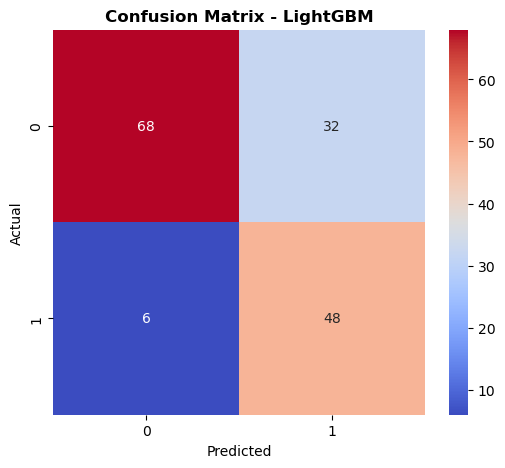

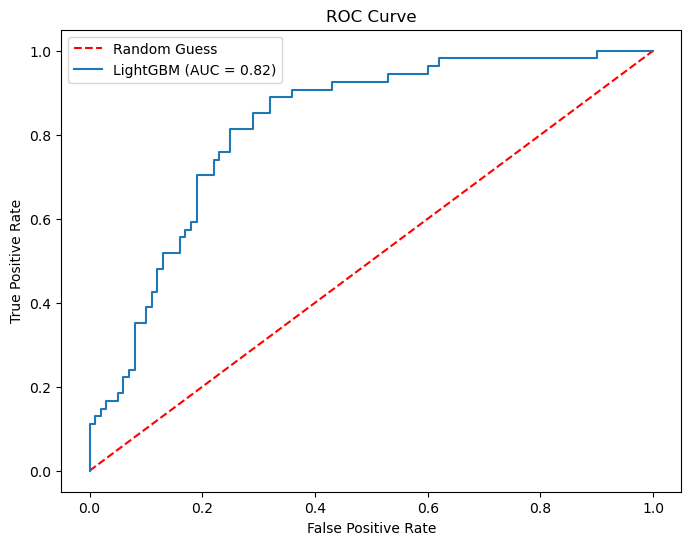

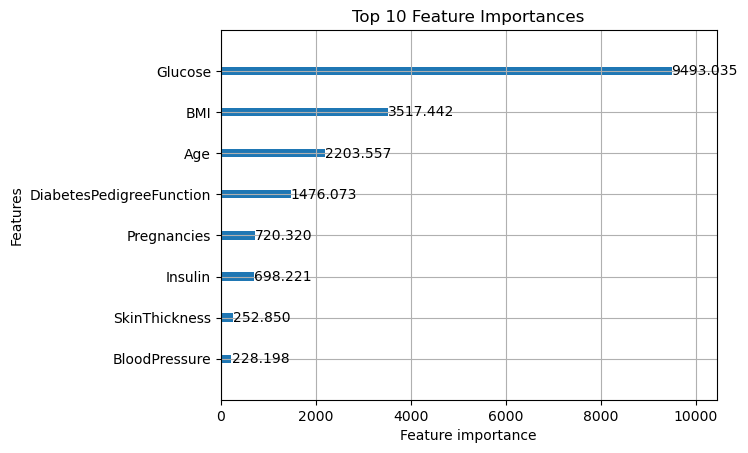

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

# ==================== Data Split =====================
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== Hyperparameter Search =====================
ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])

params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0]
}

lgb_model = lgb.LGBMClassifier(
    random_state=42,
    class_weight='balanced'  # automatically balances for class imbalance
)

print("\n================== Randomized Search CV ==============================")
random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=params,
    scoring='f1',
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("\n=== Best Params from RandomizedSearchCV ===")
print(random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# ================= Grid Search Phase =================
best_params = random_search.best_params_
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'learning_rate': [max(best_params['learning_rate'] - 0.01, 0.001), best_params['learning_rate'], best_params['learning_rate'] + 0.01],
    'max_depth': [max(best_params['max_depth'] - 1, 1), best_params['max_depth'], best_params['max_depth'] + 1],
    'subsample': [best_params['subsample']]
}

grid_search = GridSearchCV(
    lgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("\n=== Best Params from GridSearchCV ===")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# ================= Final Model =================
final_model = grid_search.best_estimator_
final_model.fit(x_train, y_train)

# ================= Threshold Optimization =================
y_pred_proba = final_model.predict_proba(x_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_pred_proba > t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nBest threshold for F1: {best_threshold:.2f}")

y_pred = (y_pred_proba > best_threshold).astype(int)

# ================= Performance Summary =================
summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
summary_df = pd.DataFrame([summary])
print("\n======= Final Model Performance =====================")
print(summary_df)

# ================= Classification Report =================
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# ================= Confusion Matrix =================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix - LightGBM", fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ================= ROC Curve =================
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ================= Feature Importance =================
lgb.plot_importance(final_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()


In [68]:
!pip install shap

   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---

In [74]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=40dba1335dacbb6ce470d9868e3ded790d50df8c5fa254eeee06b22e107ba19a
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


USING SHAP AND LIME TO EXPLAIN THE PREDICTION 

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

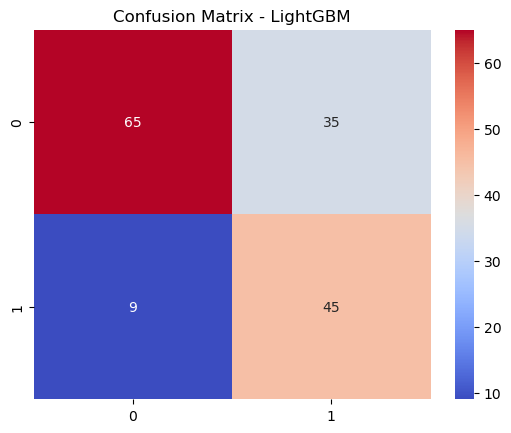

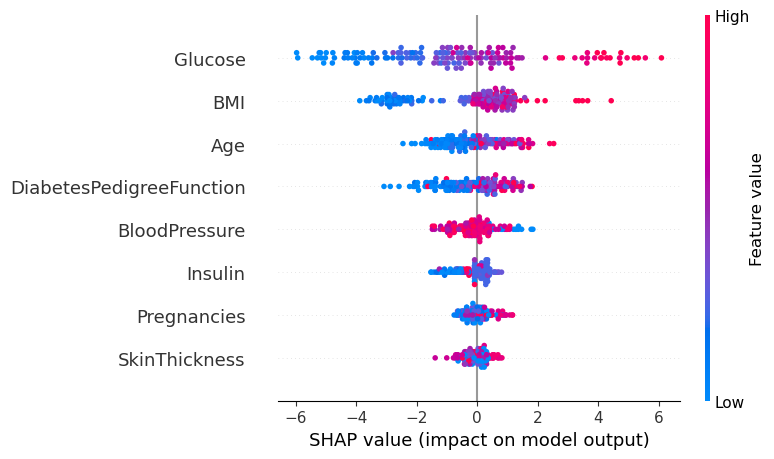

{'LIME': [('1 > 146.19', 0.5459926785169217), ('5 <= 28.40', -0.2591397304228988), ('31.00 < 7 <= 41.00', 0.08709527212587434), ('0 > 6.00', 0.06667221246672192), ('0.26 < 6 <= 0.41', -0.05930979100567724), ('4 <= 125.00', -0.0449033140436376), ('3 <= 0.00', 0.023777083708242264), ('2 <= 64.00', 0.016642989277486957)], 'SHAP': array([[ 3.95103354e-01,  3.63936708e+00, -4.40579968e-02, ...,
        -5.28777813e-01, -9.19130483e-01,  7.54360713e-01],
       [ 1.30277606e-03, -4.99397513e+00, -1.30655423e-01, ...,
        -2.73904734e-02, -8.89602357e-01,  1.00154281e+00],
       [ 6.96345943e-03, -2.78312860e+00,  9.58728055e-02, ...,
         4.14546393e-01,  4.18249811e-01, -1.25404989e+00],
       ...,
       [-2.35645889e-01, -3.74384045e+00, -1.40969110e+00, ...,
        -5.63124871e-01,  8.09797842e-01, -4.24651797e-01],
       [-6.55553237e-01,  4.38404088e+00, -7.16597239e-02, ...,
         1.89862577e-01, -1.01939972e+00, -2.58568974e-02],
       [-3.15362329e-01, -5.16161862e+0

In [75]:
import shap 
import lime 
from lime.lime_tabular import LimeTabularExplainer 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Handle class imbalance
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# ==================== Model =====================
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Fit model
lgb_model.fit(x_train_res, y_train_res)

# ==================== Threshold Optimization =====================
y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.36  # fallback
print(f"Best threshold: {best_threshold:.2f}")

y_pred = (y_pred_proba > best_threshold).astype(int)

# ==================== Performance Summary =====================
summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred)
}
print(pd.DataFrame([summary]))
print(classification_report(y_test, y_pred, zero_division=0))

# ==================== Confusion Matrix =====================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix - LightGBM")
plt.show()

#===============Shap Explainer ================= 
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer(x_test)
shap_values_for_class1 = shap_values.values if hasattr(shap_values, "values") else shap_values[1]
shap.summary_plot(shap_values_for_class1, x_test)

# ================ LIME Explainer =================
instance = x_test.iloc[0]
explainer_lime = LimeTabularExplainer(
    x_train_res.values,
    training_labels=y_train_res.values,
    mode="classification"
)

lime_exp = explainer_lime.explain_instance(instance.values, lgb_model.predict_proba)
lime_interpretation = lime_exp.as_list()

# ================ Combined Interpretation =================
combined_interpretation = {
    "LIME": lime_interpretation,
    "SHAP": shap_values_for_class1
}

print(combined_interpretation)